In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import pytrends

In [44]:
df = pd.read_csv(
    "../data/googletrends/VEDEkeywords.csv", skiprows=range(1), index_col=0
)
df

,emigrar a alemania: (Venezuela),trabajar en alemania: (Venezuela),vivir en alemania: (Venezuela),asilo en alemania: (Venezuela)
Mes,,,,
2014-06,0,0,30,0
2014-07,54,73,0,0
2014-08,48,0,0,0
2014-09,0,44,0,0
2014-10,21,0,33,0
...,...,...,...,...
2023-01,39,0,52,28
2023-02,0,70,0,0
2023-03,0,0,43,38


In [45]:
df.index = pd.to_datetime(df.index, format="%Y-%m")
df

,emigrar a alemania: (Venezuela),trabajar en alemania: (Venezuela),vivir en alemania: (Venezuela),asilo en alemania: (Venezuela)
Mes,,,,
2014-06-01,0,0,30,0
2014-07-01,54,73,0,0
2014-08-01,48,0,0,0
2014-09-01,0,44,0,0
2014-10-01,21,0,33,0
...,...,...,...,...
2023-01-01,39,0,52,28
2023-02-01,0,70,0,0
2023-03-01,0,0,43,38


<AxesSubplot:>

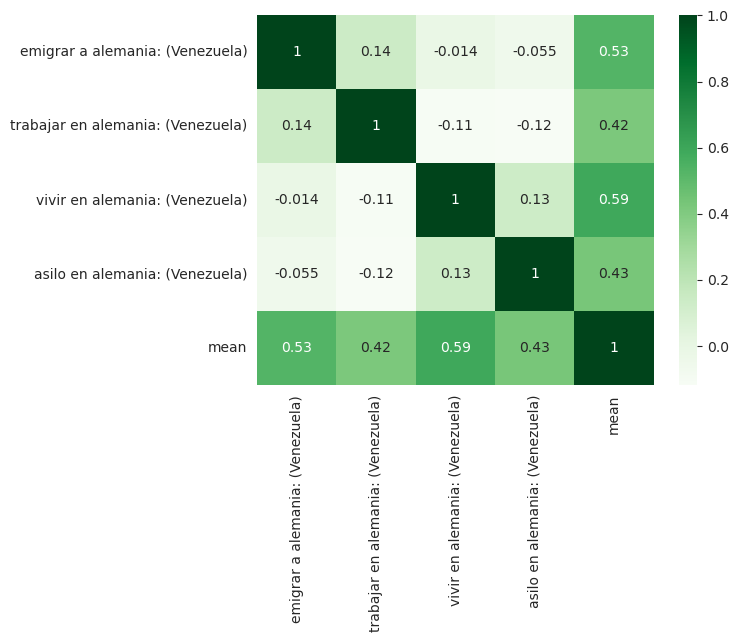

In [47]:
df["mean"] = df.mean(axis=1)
pearsoncorr = df.corr(method="pearson")
sns.heatmap(
    pearsoncorr,
    xticklabels=pearsoncorr.columns,
    yticklabels=pearsoncorr.columns,
    cmap="Greens",
    annot=True,
)

In [37]:
df.mean()

emigrar a alemania: (Venezuela)      14.351852
trabajar en alemania: (Venezuela)    11.379630
vivir en alemania: (Venezuela)       21.055556
asilo en alemania: (Venezuela)        9.370370
dtype: float64

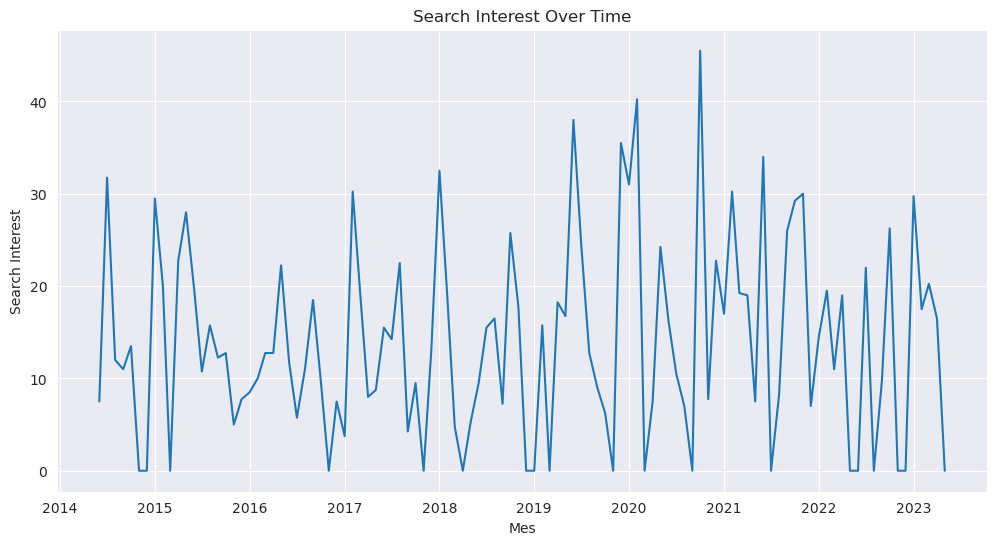

In [39]:
df.reset_index()
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Mes", y="mean")
# sns.lineplot(data=df, x='Mes', y='trabajar en alemania: (Venezuela)')
# sns.lineplot(data=df, x='Mes', y='emigrar a alemania: (Venezuela)')
plt.xlabel("Mes")
plt.ylabel("Search Interest")
plt.title("Search Interest Over Time")
plt.show()

#### Making use of pytrends API
As it is not working for now, we will continue with manual google trends queries

In [19]:
### We leave this on standby as it is not working yet through the API

In [17]:
from pytrends.request import TrendReq

pytrends = TrendReq(
    # hl='en-US'
    # , tz=360
    # , timeout=(10,25)
    # , proxies=['https://34.203.233.13:80']
    # , retries=2
    # , backoff_factor=0.1
    # , requests_args={'verify':False}
)

In [9]:
# Get Google Hot Trends data
df = pytrends.today_searches(pn="US")
df.head()

0        /trends/explore?q=Celtics&date=now+7-d&geo=US
1    /trends/explore?q=Happy+Mother's+Day&date=now+...
2      /trends/explore?q=Ja+Morant&date=now+7-d&geo=US
3    /trends/explore?q=Mother's+Day&date=now+7-d&ge...
4    /trends/explore?q=Turkey+election&date=now+7-d...
Name: exploreLink, dtype: object

In [18]:
# provide your search terms
kw_list = ["trabajar en alemania", "emigrar a alemania", "vivir en alemania"]

# search interest per region
# run model for keywords (can also be competitors)
pytrends.build_payload(kw_list, timeframe="today 9-y", geo="VE")

# Interest by Region
regiondf = pytrends.multirange_interest_over_time()
# looking at rows where all values are not equal to 0
regiondf = regiondf[(regiondf != 0).all(1)]

# drop all rows that have null values in all columns
regiondf.dropna(how="all", axis=0, inplace=True)

# visualise
regiondf.plot(figsize=(20, 12), y=kw_list, kind="bar")

ResponseError: The request failed: Google returned a response with code 400